# MLB惯用手对于投球手的数据差异实验报告
本实验数据基于Sean Lahman(http://www.seanlahman.com/baseball-archive/statistics/) 所采集的1871-2016年MLB数据
### 实验目的
通过对数据集分析，探索惯用手不同和表现差异之间的相关性，针对击球手位置
### 表现评估准则
评估击球表现采用三个量化标准：
#### 1.打击率 BA = H / AB 
#### 2.上垒率 OBP = （H+BB+HBP）/（AB+BB+HBP+SF）
#### 3.长打率 SLG = [H+2(2B)+3(3B)+4HR]/AB
#### 4.攻击指数 OPS = OBP + SLG
（其中H为安全打击数，AB为上场打击的次数,HR为全垒打数，2B为二垒打数，3B为三垒打数，BB为保送数，HBP为触身球数，SF为牺牲球数）
### 零假设
无论球员的惯用手如何，表现数据都不会和整体有显著差距

In [1]:
#读取数据
import pandas as pd

batting_data = pd.read_csv("Batting.csv")
len(batting_data)

102816

In [2]:
#删除用不到的列
data_to_drop = ["stint","teamID","yearID","lgID","G","R"
               ,"RBI","SB","CS","SO","IBB","SH","GIDP"]
batting_data.drop(labels = data_to_drop,axis = 1,inplace = True)
len(batting_data)

102816

In [3]:
#找出数据值不存在的球员的函数
def get_null_index(dataframe_obj,position = 1):
    null_num_list = dataframe_obj.isnull().sum(axis = position).tolist()
    list_to_drop = []
    for i in range(len(null_num_list)):
        if null_num_list[i] != 0L:
            list_to_drop.append(i)
    return list_to_drop

In [4]:
#清除核心值不存在的球员
list_to_drop = get_null_index(batting_data)

batting_data.drop(labels = list_to_drop,axis = 0,inplace = True)   
batting_data.head()
#删除所有没有击球数据不完整的球手 

,playerID,AB,H,2B,3B,HR,BB,HBP,SF
4560,colemjo02,0,0,0,0,0,0,0.0,0.0
5088,brynato01,0,0,0,0,0,0,0.0,0.0
5177,dunnian01,0,0,0,0,0,0,0.0,0.0
5415,sulliji01,0,0,0,0,0,0,0.0,0.0
5747,viaule01,0,0,0,0,0,0,0.0,0.0


In [5]:
#删除所有AB值为0的球员数据 可能是投球手位置
data_to_drop = batting_data[batting_data["AB"] == 0].index
batting_data.drop(labels = data_to_drop,axis = 0,inplace = True)
batting_data.head()

,playerID,AB,H,2B,3B,HR,BB,HBP,SF
36873,aaronha01,468,131,27,6,13,28,3.0,4.0
36874,aberal01,39,5,0,0,0,2,0.0,1.0
36875,abramca01,42,6,1,1,0,10,0.0,0.0
36876,abramca01,423,124,22,7,6,72,4.0,1.0
36877,adamsbo03,390,105,25,6,3,55,3.0,2.0


In [6]:
#计算核心表现值，并删除掉多余的列
batting_data["BA"] = pd.DataFrame(batting_data["H"] / batting_data["AB"])
batting_data["OBP"] = pd.DataFrame((batting_data["H"] + batting_data["BB"] + batting_data["HBP"])
                                    /(batting_data["AB"] + batting_data["BB"] + batting_data["HBP"]+batting_data["SF"]))
batting_data["SLG"] = pd.DataFrame(( batting_data["H"] + 2*batting_data["2B"]+3*batting_data["3B"]
                                   +4*batting_data["HR"]) / batting_data["AB"])
batting_data["OPS"] = pd.DataFrame(batting_data["SLG"] + batting_data["OBP"])
data_to_drop = ["AB","H","2B","3B","HR","BB","HBP","SF"]
batting_data.drop(labels = data_to_drop,axis = 1,inplace = True)
batting_data.head()

,playerID,BA,OBP,SLG,OPS
36873,aaronha01,0.279915,0.322068,0.544872,0.866939
36874,aberal01,0.128205,0.166667,0.128205,0.294872
36875,abramca01,0.142857,0.307692,0.261905,0.569597
36876,abramca01,0.293144,0.400000,0.503546,0.903546
36877,adamsbo03,0.269231,0.362222,0.474359,0.836581


In [7]:
#击球总体数据概览
batting_data.describe()

,BA,OBP,SLG,OPS
count,51704.000000,51704.000000,51704.000000,51704.000000
mean,0.202597,0.257936,0.348390,0.606326
std,0.125599,0.139285,0.249281,0.368948
min,0.000000,0.000000,0.000000,0.000000
25%,0.136364,0.187500,0.176471,0.376623
50%,0.228395,0.290640,0.373570,0.668095
75%,0.270588,0.336957,0.495687,0.826087
max,1.000000,1.000000,5.000000,6.000000


In [8]:
#读取球员惯用手数据，去除多余列
player_data = pd.read_csv("Master.csv")
list_to_drop = ["birthYear","birthMonth","birthDay","birthCountry","birthState","birthCity","deathYear",
                "deathMonth","deathDay","deathCountry","deathState","deathCity","nameFirst","nameLast","nameGiven",
                "weight","height","throws","debut","finalGame","retroID","bbrefID"]
player_data.drop(labels = list_to_drop,axis = 1,inplace = True)
list_to_drop = get_null_index(player_data)
player_data.drop(labels = list_to_drop,axis = 0,inplace = True)
player_data.head(25)


,playerID,bats
0,aardsda01,R
1,aaronha01,R
2,aaronto01,R
3,aasedo01,R
4,abadan01,L
5,abadfe01,L
6,abadijo01,R
7,abbated01,R
8,abbeybe01,R
9,abbeych01,L


In [9]:
#根据球员惯用手进行分组
mixed_data = pd.merge(batting_data,player_data,on = "playerID")
r_group = mixed_data[mixed_data["bats"] == "R"]
l_group = mixed_data[mixed_data["bats"] == "L"]
b_group = mixed_data[mixed_data["bats"] == "B"]

r_handed_data = r_group.groupby("playerID").mean()
l_handed_data = l_group.groupby("playerID").mean()
anbi_data = b_group.groupby("playerID").mean()

all_data = r_handed_data.append(l_handed_data,ignore_index=True).append(anbi_data,ignore_index=True)

Populating the interactive namespace from numpy and matplotlib


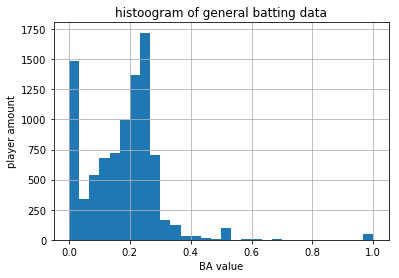

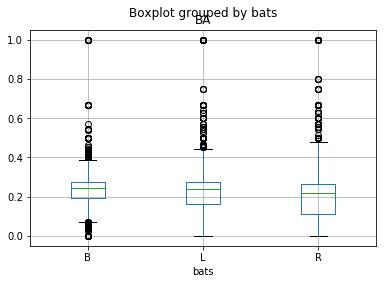

In [20]:
#数据总览
%pylab inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.title("histoogram of general batting data")
plt.xlabel("BA value")
plt.ylabel("player amount")
all_data["BA"].hist(bins = 30)
mixed_data.boxplot(column  = "BA",by = "bats")

## 分析
   由总体BA值的数据可以看出，击球手的击球数据呈正态分布，不过有很多球员的数据集中在接近零值。因为已经清除了上场但没击球的选手（他们可能是投球手），这些选手可能主要位置不是击球手，上场击球数过低。从箱线图来看，惯用手不同的选手的打击率很接近，但是右撇子的数据平均值略低。其中双手都善用的球员数据更集中，击球率较低的球员较少。三种惯用手的球员数据都有很多的离群值，反映出MLB球员中有小部分数据卓越的击球手，他们很可能就是名人榜球员。

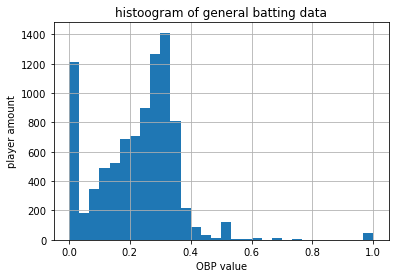

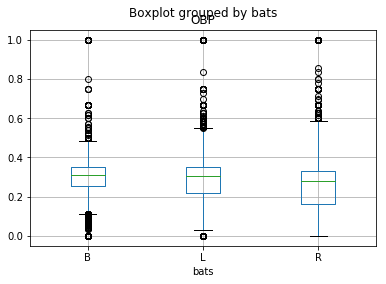

In [24]:
plt.xlabel("OBP value")
plt.ylabel("player amount")
plt.title("histoogram of general batting data")
all_data["OBP"].hist(bins = 30)
mixed_data.boxplot(column  = "OBP",by = "bats")

## 分析 
球员的上垒率数据和打击率数据相似度很高，总体数据也呈明显正态分布。

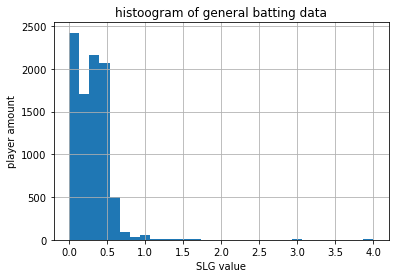

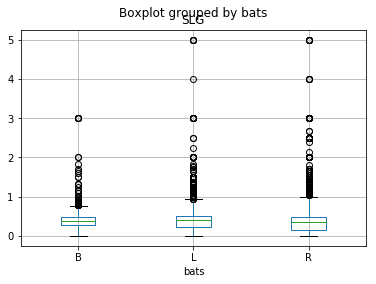

In [22]:
plt.xlabel("SLG value")
plt.ylabel("player amount")
plt.title("histoogram of general batting data")
all_data["SLG"].hist(bins = 30)
mixed_data.boxplot(column  = "SLG",by = "bats")

## 分析
不同于前两个表现数据，SLG的总体数据正态趋势不明显，大部分球员的数据集中在低于0.5的水平，可以体现出大部分球员的长打水平不高。从箱线图来看，三种惯用手的球员数据还是很接近，离群值之外的数据都保持在0到1之间，这也符合正常球员的长打数据特点。

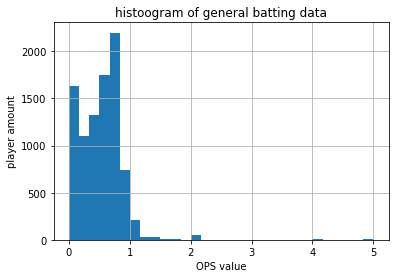

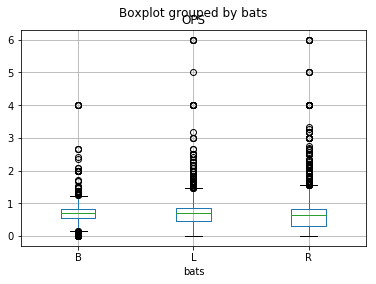

In [23]:
plt.xlabel("OPS value")
plt.ylabel("player amount")
plt.title("histoogram of general batting data")
all_data["OPS"].hist(bins = 30)
mixed_data.boxplot(column  = "OPS",by = "bats")

## 分析
攻击指数数据接近于打击率与上垒率数据，整体呈正态分布，三种惯用手球员数据仍较接近。

In [14]:
#编写根据数据值获得对应z值的函数
z_table = pd.read_csv("Ztable.csv")
def get_z_value(float_value):
    decimal2 = round(float_value,1)
    if decimal2 - float_value > 0:
        decimal2 = decimal2 - 0.1 
    decimal3 = round(float_value,2)
    row_index = int(decimal2 * 10)
    column_index = int((decimal3 - decimal2)/0.01) 
    row_ex = z_table.iloc[row_index]
    row_ex.drop(labels = "Z",inplace = True)
    return row_ex[column_index]
get_z_value(0.0944)

0.46399999999999997

In [15]:
#获取z值的函数
BA_mean = all_data["BA"].mean()
OBP_mean = all_data["OBP"].mean()
SLG_mean = all_data["SLG"].mean()
OPS_mean = all_data["OPS"].mean()
def compare_correlation_with_all(data):
        BA_std_dis = abs((data["BA"].mean() - BA_mean) / data["BA"].std(ddof = 0))
        OBP_std_dis = abs((data["OBP"].mean() - OBP_mean) / data["OBP"].std(ddof = 0)) 
        SLG_std_dis = abs((data["SLG"].mean() - SLG_mean) / data["SLG"].std(ddof = 0))
        OPS_std_dis = abs((data["OPS"].mean() - OPS_mean) / data["OPS"].std(ddof = 0))
        
        BP_p = get_z_value(BA_std_dis)
        OBP_p = get_z_value(OBP_std_dis)
        SLG_p = get_z_value(SLG_std_dis)
        OPS_p = get_z_value(OPS_std_dis)
        return  BP_p,OBP_p,SLG_p,OPS_p



In [16]:
#右撇子的数据
print compare_correlation_with_all(r_handed_data)
r_handed_data.describe()

(0.47600000000000003, 0.46799999999999997, 0.47999999999999998, 0.47200000000000003)


,BA,OBP,SLG,OPS
count,5812.000000,5812.000000,5812.000000,5812.000000
mean,0.167802,0.212452,0.277516,0.489968
std,0.127260,0.139986,0.249810,0.371927
min,0.000000,0.000000,0.000000,0.000000
25%,0.079315,0.120000,0.096439,0.225769
50%,0.179546,0.231641,0.267738,0.500000
75%,0.242446,0.302555,0.418104,0.720280
max,1.000000,1.000000,4.000000,5.000000


右撇子的平均值数据是三种惯用手中最低的，但是不具有统计显著性，造成数据低下可能有多种原因，有可能针对右投手左撇子击球手更占优势，需要设计实验证明。

In [17]:
#左撇子的数据
compare_correlation_with_all(l_handed_data)
l_handed_data.describe()

,BA,OBP,SLG,OPS
count,2550.000000,2550.000000,2550.000000,2550.000000
mean,0.184411,0.238720,0.307284,0.546004
std,0.117014,0.133045,0.215585,0.333192
min,0.000000,0.000000,0.000000,0.000000
25%,0.114286,0.160597,0.148341,0.326770
50%,0.205549,0.268120,0.324666,0.601291
75%,0.250982,0.322166,0.442257,0.761913
max,1.000000,1.000000,3.000000,4.000000


左撇子数据平均值居中，同样不具有统计差异性。

In [18]:
#左右手都善用的人的数据
compare_correlation_with_all(anbi_data)
anbi_data.describe()

,BA,OBP,SLG,OPS
count,736.000000,736.000000,736.000000,736.000000
mean,0.202890,0.266034,0.333429,0.599463
std,0.091458,0.101544,0.188998,0.277779
min,0.000000,0.000000,0.000000,0.000000
25%,0.163089,0.223337,0.239717,0.473836
50%,0.222068,0.286792,0.351922,0.642737
75%,0.254435,0.323145,0.428336,0.749589
max,1.000000,1.000000,3.000000,4.000000


左右手都善用的人数据最优秀，但同样不具有统计显著性，有可能因为可以针对不同善用手投球手作出调整。

# 实验结果
直接对比各项数据，可以发现双手都善用的击球手的数据有略微的优势，但最终实验结果无法否定零假设，即惯用手和球员的表现数据没有显著的统计差异，这也是可以预料到的。本次实验结果只是暂时的，会依照今后更详尽科学的实验方法进行改进。